In [19]:
import pandas as pd
 
# The selected 4 Venues are Ylläs, Himos, Serena and Ruka
train_venues = [
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Yllas_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Himos_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Serena_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Ruka_final.csv"
]
train_dfs = [pd.read_csv(f) for f in train_venues]
df_train = pd.concat(train_dfs, ignore_index=True)
 
# The selected Venue for testing is Tahko
test_venue = "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Tahko_final.csv"
df_test = pd.read_csv(test_venue)
 
df_train.shape, df_test.shape

((29587, 8), (7305, 8))

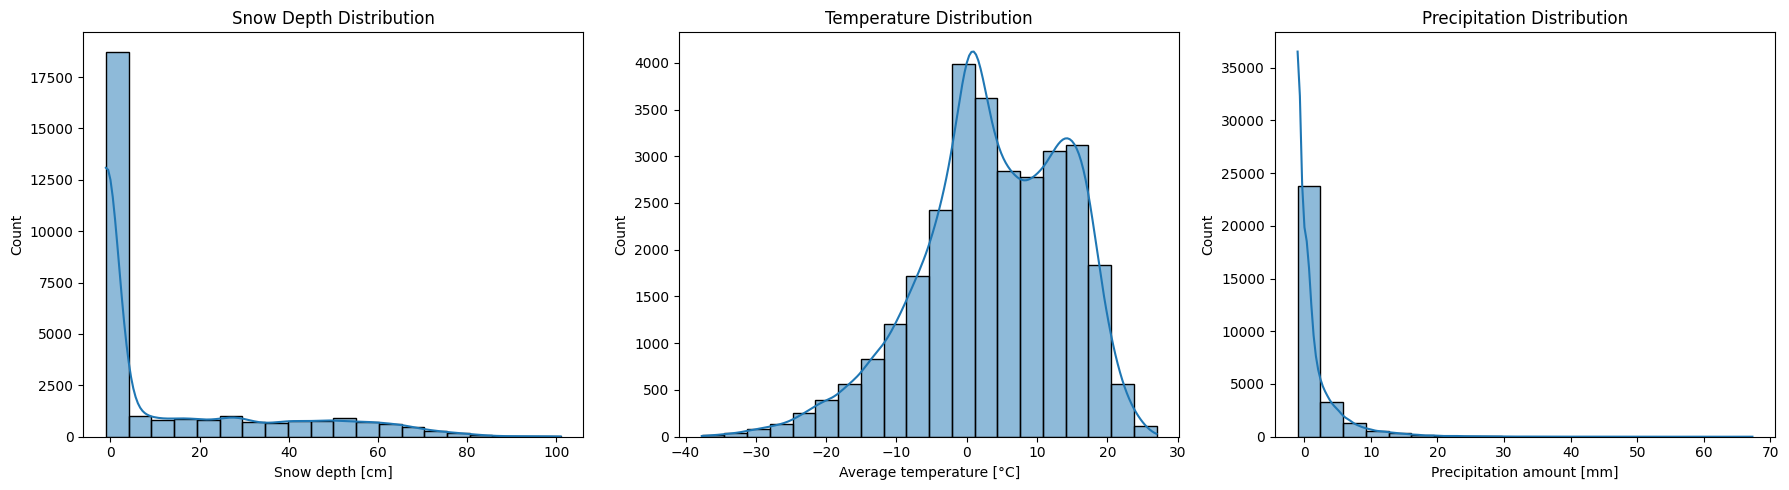

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of snow depth, temperature, and precipitation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Snow Depth
sns.histplot(df_train["Snow depth [cm]"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Snow Depth Distribution")

# Temperature
sns.histplot(df_train["Average temperature [°C]"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Temperature Distribution")

# Precipitation
sns.histplot(df_train["Precipitation amount [mm]"], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Precipitation Distribution")

plt.tight_layout()
plt.show()

In [21]:
# Calculate basic statistics for Snow Depth
snow_depth_stats = df_train["Snow depth [cm]"].describe()
print(snow_depth_stats)


count    29452.000000
mean        12.991930
std         22.107289
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         23.000000
max        101.000000
Name: Snow depth [cm], dtype: float64


In [22]:
import pandas as pd
import glob
import os

# Path to folder with CSV files
path = "C:\\Repos\\Project2\\WeatherMachine\\Final_data_scripts\\Data"

# Read all CSV files
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Create an empty list to store dataframes
dfs = []

# Load each file and extract the venue name
for file in csv_files:
    df = pd.read_csv(file)

    # Extract venue name (part before the first underscore)
    filename = os.path.basename(file)  # Get file name without path
    venue_name = filename.split("_")[0]  # Take the part before "_"

    # Add Venue column
    df["Venue"] = venue_name
    dfs.append(df)

# Merge all dataframes into one
df_all = pd.concat(dfs, ignore_index=True)

# Convert Date column to datetime
df_all["Date"] = pd.to_datetime(df_all["Date"])

# Sort by Date (important for trend analysis)
df_all = df_all.sort_values(by=["Venue", "Date"])

# Print a sample of the dataframe to verify
print(df_all.head())

df_all



        Date  Precipitation amount [mm]  Snow depth [cm]  \
0 2005-01-02                        3.1             16.0   
1 2005-01-03                        0.4             19.0   
2 2005-01-04                        1.5             20.0   
3 2005-01-05                        4.3             20.0   
4 2005-01-06                        4.0             34.0   

   Average temperature [°C]  cloud_cover_code  \
0                      -0.3               8.0   
1                      -0.8               7.0   
2                      -2.3               8.0   
3                      -2.9               8.0   
4                      -2.2               8.0   

   Direct solar radiation mean [W/m2]  days_above_10cm  days_above_20cm  \
0                                 1.1                1                0   
1                                 0.7                2                0   
2                                 1.8                3                0   
3                                 1.8       

,Date,Precipitation amount [mm],Snow depth [cm],Average temperature [°C],cloud_cover_code,Direct solar radiation mean [W/m2],days_above_10cm,days_above_20cm,Venue,Predicted Snow Depth [cm]
0,2005-01-02,3.1,16.0,-0.3,8.0,1.1,1,0,Himos,NaN
1,2005-01-03,0.4,19.0,-0.8,7.0,0.7,2,0,Himos,NaN
2,2005-01-04,1.5,20.0,-2.3,8.0,1.8,3,0,Himos,NaN
3,2005-01-05,4.3,20.0,-2.9,8.0,1.8,4,0,Himos,NaN
4,2005-01-06,4.0,34.0,-2.2,8.0,1.7,5,1,Himos,NaN
...,...,...,...,...,...,...,...,...,...,...
58446,2024-12-31,-1.0,34.0,-2.2,8.0,61.7,36,16,predicted,23.966696
36526,2025-01-01,0.9,8.0,-3.6,0.0,-0.7,0,0,predicted,19.555355
43831,2025-01-01,0.2,16.0,-3.5,5.0,-0.7,12,0,predicted,19.591681
51138,2025-01-01,0.7,12.0,-5.0,5.0,-0.7,15,0,predicted,23.016701


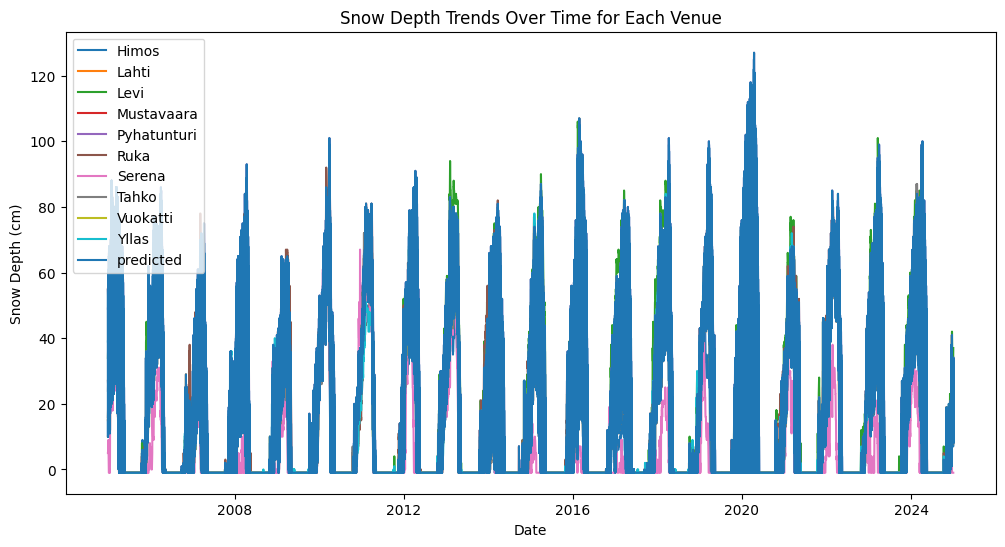

In [23]:
import matplotlib.pyplot as plt

# Plot snow depth over time for each venue
plt.figure(figsize=(12, 6))

for venue in df_all["Venue"].unique():
    df_venue = df_all[df_all["Venue"] == venue]
    plt.plot(df_venue["Date"], df_venue["Snow depth [cm]"], label=venue)

plt.xlabel("Date")
plt.ylabel("Snow Depth (cm)")
plt.title("Snow Depth Trends Over Time for Each Venue")
plt.legend()
plt.show()



In [24]:
# Count consecutive days with snow > 10 cm
df_all['days_above_10cm'] = (df_all['Snow depth [cm]'] > 10).astype(int)
df_all['days_above_10cm'] = df_all.groupby(["Venue", (df_all['Snow depth [cm]'] <= 10).cumsum()])['days_above_10cm'].cumsum()

# Count consecutive days with snow > 20 cm
df_all['days_above_20cm'] = (df_all['Snow depth [cm]'] > 20).astype(int)
df_all['days_above_20cm'] = df_all.groupby(["Venue", (df_all['Snow depth [cm]'] <= 20).cumsum()])['days_above_20cm'].cumsum()


In [107]:
# Define function to check if a venue meets the criteria
def check_snow_viability(df, venue):
    df_venue = df[df["Venue"] == venue]
    has_10cm_weeks = (df_venue["days_above_10cm"] >= 28).any()  # At least 4 weeks
    has_20cm_weeks = (df_venue["days_above_20cm"] >= 14).any()  # At least 2 weeks
    return {"Venue": venue, "4 weeks > 10cm": has_10cm_weeks, "2 weeks > 20cm": has_20cm_weeks}

# Apply to all venues
viability_results = [check_snow_viability(df_all, v) for v in df_all["Venue"].unique()]
df_viability = pd.DataFrame(viability_results)

print(df_viability)


          Venue  4 weeks > 10cm  2 weeks > 20cm
0         Himos            True            True
1         Lahti            True            True
2          Levi            True            True
3    Mustavaara            True            True
4   Pyhatunturi            True            True
5          Ruka            True            True
6        Serena            True            True
7         Tahko            True            True
8      Vuokatti            True            True
9         Yllas            True            True
10    predicted            True            True


In [93]:
print(df_test.isna().sum())

df_test.ffill(inplace = True)
df_test.bfill(inplace = True)
df_train.bfill(inplace=True)
df_train.ffill(inplace=True)

print(df_test.isna().sum())

Date                                  0
cloud_cover_code                      0
Precipitation amount [mm]             0
Snow depth [cm]                       0
Average temperature [°C]              0
Direct solar radiation mean [W/m2]    0
days_above_10cm                       0
days_above_20cm                       0
Venue                                 0
Predicted Snow Depth [cm]             0
dtype: int64
Date                                  0
cloud_cover_code                      0
Precipitation amount [mm]             0
Snow depth [cm]                       0
Average temperature [°C]              0
Direct solar radiation mean [W/m2]    0
days_above_10cm                       0
days_above_20cm                       0
Venue                                 0
Predicted Snow Depth [cm]             0
dtype: int64


In [69]:
features = ["Precipitation amount [mm]", "Average temperature [°C]", "cloud_cover_code", "Direct solar radiation mean [W/m2]"]
X_train, y_train = df_train[features], df_train["Snow depth [cm]"]
X_test, y_test = df_test[features], df_test["Snow depth [cm]"]

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score
 
# Polynomial Model
poly_degree = 3
model = make_pipeline(PolynomialFeatures(poly_degree), LinearRegression())
 
model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)
 
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 10.536765826381274
R²: 0.4546694207502646


In [75]:
import pandas as pd

# Function to extract venue name from URL
def extract_venue_name(url):
    return url.split("/")[-1].split("_")[0]  # Extract before "_final.csv"

# Load and label training data
train_venues = [
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Yllas_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Himos_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Serena_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Ruka_final.csv"
]
train_dfs = [pd.read_csv(f).assign(Venue=extract_venue_name(f)) for f in train_venues]
df_train = pd.concat(train_dfs, ignore_index=True)

# Load and label test data
test_venue = "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Tahko_final.csv"
df_test = pd.read_csv(test_venue).assign(Venue=extract_venue_name(test_venue))

# Load and label future venues
remaining_venues = [
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Lahti_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Vuokatti_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Mustavaara_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Pyhatunturi_final.csv"
]
remaining_dfs = [pd.read_csv(f).assign(Venue=extract_venue_name(f)) for f in remaining_venues]
df_remaining = pd.concat(remaining_dfs, ignore_index=True)

print(df_train.head())  # Check venue names are correctly added


         Date  Precipitation amount [mm]  Snow depth [cm]  \
0  2005-01-02                        5.2             39.0   
1  2005-01-03                        1.2             39.0   
2  2005-01-04                       -1.0             39.0   
3  2005-01-05                        2.4             39.0   
4  2005-01-06                        0.8             40.0   

   Average temperature [°C]  cloud_cover_code  \
0                      -1.9               1.0   
1                      -2.0               8.0   
2                      -7.9               9.0   
3                      -6.7               8.0   
4                      -6.7               8.0   

   Direct solar radiation mean [W/m2]  days_above_10cm  days_above_20cm  Venue  
0                                 1.1                1                1  Yllas  
1                                 0.7                2                2  Yllas  
2                                 1.8                3                3  Yllas  
3             

In [101]:
df_remaining.bfill(inplace=True)
df_remaining.ffill(inplace=True)
df_remaining.isna().sum()

Date                                  0
cloud_cover_code                      0
Precipitation amount [mm]             0
Snow depth [cm]                       0
Average temperature [°C]              0
Direct solar radiation mean [W/m2]    0
days_above_10cm                       0
days_above_20cm                       0
Venue                                 0
Year                                  0
dtype: int64

In [104]:
# Count consecutive days with >10 cm of snow
df_remaining['days_above_10cm'] = (df_remaining['Predicted Snow Depth [cm]'] > 10).astype(int)
df_remaining['days_above_10cm'] = df_remaining.groupby((df_remaining['Predicted Snow Depth [cm]'] <= 10).cumsum())['days_above_10cm'].cumsum()

# Count consecutive days with >20 cm of snow
df_remaining['days_above_20cm'] = (df_remaining['Predicted Snow Depth [cm]'] > 20).astype(int)
df_remaining['days_above_20cm'] = df_remaining.groupby((df_remaining['Predicted Snow Depth [cm]'] <= 20).cumsum())['days_above_20cm'].cumsum()

# Check if each venue meets snow criteria
df_viability = df_remaining.groupby("Venue").agg(
    max_10cm=("days_above_10cm", "max"),
    max_20cm=("days_above_20cm", "max")
).reset_index()

df_viability["Meets 4 Weeks > 10cm"] = df_viability["max_10cm"] >= 28
df_viability["Meets 2 Weeks > 20cm"] = df_viability["max_20cm"] >= 14

print(df_viability)


         Venue  max_10cm  max_20cm  Meets 4 Weeks > 10cm  Meets 2 Weeks > 20cm
0        Lahti       145        59                  True                  True
1   Mustavaara       200        87                  True                  True
2  Pyhatunturi       219       105                  True                  True
3     Vuokatti       175        80                  True                  True


In [95]:
df_test["Predicted Snow Depth [cm]"] = model.predict(df_test[["Precipitation amount [mm]", "Average temperature [°C]", "cloud_cover_code", "Direct solar radiation mean [W/m2]"]])

In [103]:
df_remaining["Predicted Snow Depth [cm]"] = model.predict(df_remaining[features])

In [105]:
# Count consecutive days with >10 cm of snow
df_remaining['days_above_10cm'] = (df_remaining['Predicted Snow Depth [cm]'] > 10).astype(int)
df_remaining['days_above_10cm'] = df_remaining.groupby((df_remaining['Predicted Snow Depth [cm]'] <= 10).cumsum())['days_above_10cm'].cumsum()

# Count consecutive days with >20 cm of snow
df_remaining['days_above_20cm'] = (df_remaining['Predicted Snow Depth [cm]'] > 20).astype(int)
df_remaining['days_above_20cm'] = df_remaining.groupby((df_remaining['Predicted Snow Depth [cm]'] <= 20).cumsum())['days_above_20cm'].cumsum()

# Check if each venue meets snow criteria
df_viability = df_remaining.groupby("Venue").agg(
    max_10cm=("days_above_10cm", "max"),
    max_20cm=("days_above_20cm", "max")
).reset_index()

df_viability["Meets 4 Weeks > 10cm"] = df_viability["max_10cm"] >= 28
df_viability["Meets 2 Weeks > 20cm"] = df_viability["max_20cm"] >= 14

print(df_viability)


         Venue  max_10cm  max_20cm  Meets 4 Weeks > 10cm  Meets 2 Weeks > 20cm
0        Lahti       145        59                  True                  True
1   Mustavaara       200        87                  True                  True
2  Pyhatunturi       219       105                  True                  True
3     Vuokatti       175        80                  True                  True


In [106]:
import pandas as pd

# Ensure Date is in datetime format
df_remaining["Date"] = pd.to_datetime(df_remaining["Date"])

# Extract Year for analysis
df_remaining["Year"] = df_remaining["Date"].dt.year

# Define a function to find the first year where a venue fails to meet snow depth criteria
def find_failure_year(df, venue):
    df_venue = df[df["Venue"] == venue].copy()
    df_venue = df_venue.sort_values(by="Date")
    
    # Check consecutive days with snow depth >= 10 cm and >= 20 cm
    df_venue["days_above_10cm"] = (df_venue["Predicted Snow Depth [cm]"] >= 10).astype(int)
    df_venue["days_above_10cm"] = df_venue.groupby((df_venue["Predicted Snow Depth [cm]"] < 10).cumsum())['days_above_10cm'].cumsum()
    
    df_venue["days_above_20cm"] = (df_venue["Predicted Snow Depth [cm]"] >= 20).astype(int)
    df_venue["days_above_20cm"] = df_venue.groupby((df_venue["Predicted Snow Depth [cm]"] < 20).cumsum())['days_above_20cm'].cumsum()

    # Find the first year that fails the conditions
    failure_year_10cm = df_venue.groupby("Year")["days_above_10cm"].max()
    failure_year_20cm = df_venue.groupby("Year")["days_above_20cm"].max()

    first_failure_10cm = failure_year_10cm[failure_year_10cm < 28].first_valid_index()
    first_failure_20cm = failure_year_20cm[failure_year_20cm < 14].first_valid_index()
    
    return venue, first_failure_10cm, first_failure_20cm

# Apply function to all venues
results = [find_failure_year(df_remaining, venue) for venue in df_remaining["Venue"].unique()]

# Convert results to a DataFrame
df_failures = pd.DataFrame(results, columns=["Venue", "First Year Failing 10cm (4 weeks)", "First Year Failing 20cm (2 weeks)"])
print(df_failures)


         Venue  First Year Failing 10cm (4 weeks)  \
0        Lahti                             2025.0   
1     Vuokatti                                NaN   
2   Mustavaara                                NaN   
3  Pyhatunturi                                NaN   

   First Year Failing 20cm (2 weeks)  
0                               2008  
1                               2017  
2                               2017  
3                               2025  
